# Objective
This notebook is just an exploration on the ESG integrated strategy: Best In Class Approach. 

# What's ESG

"ESG" stands for environmental, social, and (corporate) governance. ESG investors examine criteria within these three categories to identify companies that perform well using ESG-related metrics. Combining the ESG lens with more traditional stock analysis techniques is known as ESG integration. Anyone can join the swelling ranks of ESG investors by simply learning more about ESG and then using the framework to make future investing decisions.

The ESG integrated strategy is on a spectrum, which start from simple exlusion, to the impact fund. Exclusion is the simplest form of ESG investing, which removes the industries that is harmful for the environment or society, for example tobacco, gambling and so on.

While excluding certain industries, investors are often left with limited choice for risk diversification, which is why best in class approach comes into play. In a best in class approach we only compare the ESG risks within the same industry, and exclude the companies that are doing bad (non-proactive) in the matter of corporate responsibility, energy efficiency, and managing wastes. 

# Data
Since there's no free ESG features available at the moment when I created this project, the ESG scores are scrapped from Yahoo Finance using beautiful soup. 

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\18143\OneDrive\Desktop\esg_score_yahoo_finance_scraped.csv")   
data = pd.DataFrame(data)

In [2]:
data.head()

,ticker,Sector,Market Value,Location,socialScore,governanceScore,environmentScore,totalEsg,percentile,peerSocialPerformance_min,...,peerSocialPerformance_max,peerGovernancePerformance_min,peerGovernancePerformance_avg,peerGovernancePerformance_max,peerEnvironmentPerformance_min,peerEnvironmentPerformance_avg,peerEnvironmentPerformance_max,peerEsgScorePerformance_min,peerEsgScorePerformance_avg,peerEsgScorePerformance_max
0,AAPL,Information Technology,45249778.53,United States,7.69,8.94,0.10,16.73,11.77,2.39,...,12.20,3.72,7.539091,14.10,0.04,3.244000,10.02,7.24,17.054643,26.59
1,MSFT,Information Technology,35945184.42,United States,9.37,4.90,0.47,14.74,7.55,3.90,...,17.93,4.18,7.276238,33.22,0.00,0.988812,3.67,10.19,18.866019,45.00
2,AMZN,Consumer Discretionary,28086431.52,United States,12.52,9.78,5.13,27.42,47.67,3.85,...,12.52,2.99,5.877759,10.25,0.03,2.998621,7.06,9.60,16.511774,27.42
3,FB,Communication,14039542.50,United States,17.93,12.28,1.40,31.61,63.13,3.90,...,17.93,4.18,7.276238,33.22,0.00,0.988812,3.67,10.19,18.866019,45.00
4,GOOGL,Communication,13092946.12,United States,9.87,11.94,0.48,22.29,28.96,3.90,...,17.93,4.18,7.276238,33.22,0.00,0.988812,3.67,10.19,18.866019,45.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ticker                          527 non-null    object 
 1   Sector                          527 non-null    object 
 2   Market Value                    527 non-null    float64
 3   Location                        527 non-null    object 
 4   socialScore                     527 non-null    float64
 5   governanceScore                 527 non-null    float64
 6   environmentScore                527 non-null    float64
 7   totalEsg                        527 non-null    float64
 8   percentile                      527 non-null    float64
 9   peerSocialPerformance_min       527 non-null    float64
 10  peerSocialPerformance_avg       527 non-null    float64
 11  peerSocialPerformance_max       527 non-null    float64
 12  peerGovernancePerformance_min   527 

For each stock, we have a general ESG score, and seperate E S G score for each sector, the min max and average for companies in the same segment. Now a good thing to do is to think about how to transform everything into something more usable. With this in mind, let's do some EDA to gain some insights.

In [4]:
sector = data.groupby("Sector")['ticker'].count()

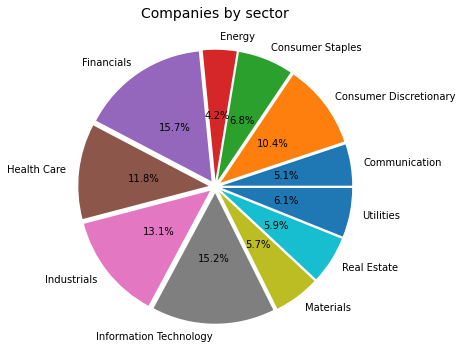

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pie, ax = plt.subplots(figsize=[10,6])
labels = sector.keys()
plt.pie(x=sector, autopct="%.1f%%", explode=[0.05]*len(sector), labels=labels, pctdistance=0.5)
plt.title("Companies by sector", fontsize=14);

We can see that Financials, Information Technology, and Healthcare are the majority of our scrapped dataset.

<AxesSubplot:title={'center':'# of companies by location'}, xlabel='Location', ylabel='# of companies'>

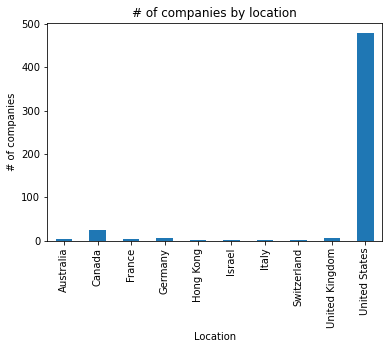

In [6]:
market_val = data.groupby("Location")['ticker'].count()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Location')
ax1.set_ylabel('# of companies')
ax1.set_title("# of companies by location")
market_val.plot(kind='bar')

This result is within the expectation, there's more US company with ESG data, our data is pretty skewed to all american companies, which isn't necessarily a bad thing. Because we no longer need to worry about the **systematic discrimination** by the ESG metrics posed on different countries.

If we use the same standards on developed country and undeveloped country, the developed countries probably would perform better just because the more comprehensive regulation framework. Penalize companies from undeveloped countries on the ESG performance seems a bit unfair.

<AxesSubplot:title={'center':'Average ESG score by sectors'}, xlabel='Sector', ylabel='Average ESG score'>

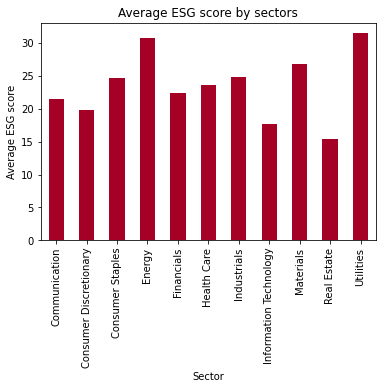

In [7]:
avg_esg = data.groupby("Sector")['totalEsg'].mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Sector')
ax1.set_ylabel('Average ESG score')
ax1.set_title("Average ESG score by sectors")
avg_esg.plot(kind='bar', cmap='RdYlBu')

A bit more on the ESG score here:

The ESG risk score scrapped from Yahoo Finance is the risk score. The ESG risk rating score is based on the unmanaged risk on an absolute range from 0 - 100. A lower ESG score here indicates less unmanaged issues on Environmental, Social, and Governance. Notice that this is different from the other type of popular ESG measure, the ESG exposure score, where a higher score indicates more transparent and better managed ESG related risks. 

Take away: 
1. Energy Sector and Utilities Sector have higher ESG risk scores, which is reasonable. Energy and Utility sectors are usually what fund managers avoid if they simply deploy the 'exclusion' strategy. However, this might be the environment factor and the ESG risk score could potentially discriminate Enegry Companies if they're held to the same standard compared to other industry.

2. Real Estate and Information Technology sectors has lowest average ESG risk scores. That is, if we look at the total ESG score. In recent years, we keep learning more about the data privacy issues from information technology companies. This could be more prominent in the 'Social' or 'Governance' side. 

Only using total ESG risk score is not enough, next I want to break it into seperate sectors.

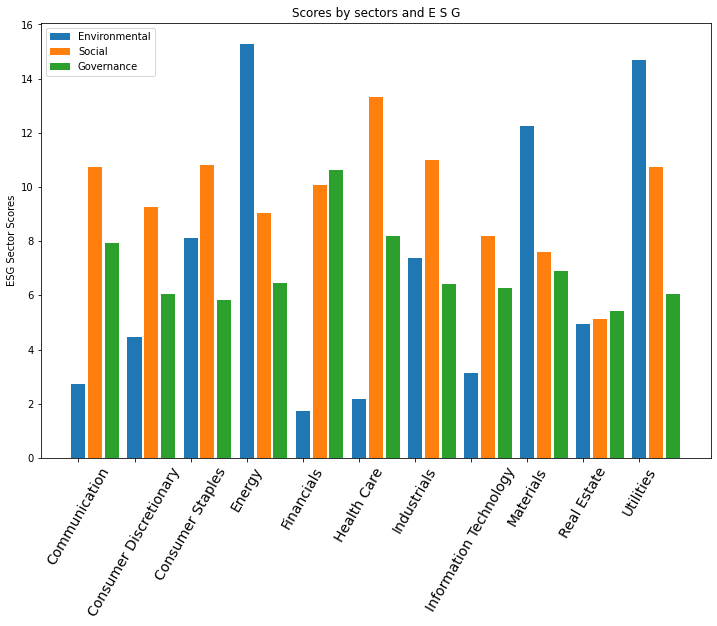

In [8]:
import numpy as np
e = data.groupby("Sector")['environmentScore'].mean()
s = data.groupby("Sector")['socialScore'].mean()
g = data.groupby("Sector")['governanceScore'].mean()

e_sd = data.groupby("Sector")['environmentScore'].std()
s_sd = data.groupby("Sector")['socialScore'].std()
g_sd = data.groupby("Sector")['governanceScore'].std()
ind = np.arange(len(sector))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=[12,8])
rects1 = ax.bar(ind + 0, e, width,
                label='Environmental')
rects2 = ax.bar(ind + 0.3, s, width,
                label='Social')
rects3 = ax.bar(ind + 0.6, g, width,
                label='Governance')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ESG Sector Scores')
ax.set_title('Scores by sectors and E S G')
ax.set_xticks(ind)
ax.set_xticklabels(sector.keys(),rotation = 60,fontsize=14)
ax.legend()

As we can see from the sector ESG risk score, although Engergy and Information Technology has high environmental risks, but health care and industrial industries have higher Social risks, whereas Financial industry has highest governance risk.

From the analysis above, we learnt that different sectors and industries have different standards on ESG, for the following sector, we will analyze ESG features within each sector.

# ESG risk for IT sector
Information Technology has been the golden goose for many ESG ETFs, for its high growth rate and the low ESG risk. Let's first look at Information Technology Sector. 

In [9]:
IT = data.loc[data['Sector'] == 'Information Technology']
IT = IT.set_index(['ticker'])

In [10]:
IT['peerEsgScorePerformance_max'].head()

ticker
AAPL    26.59
MSFT    45.00
V       45.00
MA      45.00
NVDA    34.05
Name: peerEsgScorePerformance_max, dtype: float64

If we have a look at the peer ESG max score, we can see that even within the IT sector, there're different peer groups. From the snapshot above, we see that Apple, Microsoft, and Nvidia belongs to three different peer groups. 

For now, it's probably divided in software, hardware, but we will need more investigation on this.
Next, I will find out how many peer groups are present within the IT sector.

In [11]:
IT[['peerSocialPerformance_max','peerGovernancePerformance_max','peerEnvironmentPerformance_max','peerEsgScorePerformance_max']].nunique(axis=0)

peerSocialPerformance_max         4
peerGovernancePerformance_max     4
peerEnvironmentPerformance_max    4
peerEsgScorePerformance_max       4
dtype: int64

It seems like there are 4 peer groups or subgroups, maybe we need to divide IT sector into smaller subsections. But first, let's check out what are the composition for each subgroup and if there's any useful info.

In [12]:
g = IT.groupby('peerEsgScorePerformance_max')
g.groups.keys()

dict_keys([26.59, 28.01, 34.05, 45.0])

In [13]:
IT_gp1 = IT.loc[IT['peerEsgScorePerformance_max'] == 26.59].iloc[:,3:7]
IT_gp1

,socialScore,governanceScore,environmentScore,totalEsg
ticker,,,,
AAPL,7.69,8.94,0.10,16.73
CSCO,5.94,6.08,0.54,12.55
HPQ,4.95,5.50,0.18,10.63
TEL,4.53,5.01,6.74,16.28
APH,6.02,7.70,10.02,23.74
MSI,7.18,5.30,1.97,14.43
GLW,5.20,6.89,7.91,20.00
KEYS,2.39,5.26,1.85,9.50
TRMB,3.82,5.32,3.74,12.89


Through observation, the total ESG risk score is just the sum of sector ESG scores. In reality, this probably couldn't reflect the cross-enhancement effect. 

For example, if a company has high social risk with controversal employee and contractor relationship, it doesn't matter how environmental friendly that company is. With this in mind, I created quadratic and cubic terms using the product of the three sector risks. 


In [14]:
IT_gp1['E*S*G'] = IT_gp1['socialScore'] + IT_gp1['governanceScore'] +IT_gp1['environmentScore']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
IT_gp1 = pd.DataFrame(scaler.fit_transform(IT_gp1),columns = IT_gp1.columns,index = IT_gp1.index)

In [16]:
IT_gp1

,socialScore,governanceScore,environmentScore,totalEsg,E*S*G
ticker,,,,,
AAPL,0.702918,1.000000,0.000000,0.507725,0.507725
CSCO,0.470822,0.447876,0.044355,0.214185,0.214888
HPQ,0.339523,0.335907,0.008065,0.079354,0.079354
TEL,0.283820,0.241313,0.669355,0.476124,0.476124
APH,0.481432,0.760618,1.000000,1.000000,1.000000
MSI,0.635279,0.297297,0.188508,0.346208,0.347612
GLW,0.372679,0.604247,0.787298,0.737360,0.737360
KEYS,0.000000,0.289575,0.176411,0.000000,0.000000
TRMB,0.189655,0.301158,0.366935,0.238062,0.237360


Next, we save the company tickers for companies which have ESG risk and seperate social, governance, and environmental risk in the 70% percentile and drop the companies that doesn't fit in this critera.

In [17]:
IT_gp1=IT_gp1[IT_gp1 < IT_gp1.quantile(.70)].dropna()

,socialScore,governanceScore,environmentScore,totalEsg,E*S*G
ticker,,,,,
CSCO,0.470822,0.447876,0.044355,0.214185,0.214888
HPQ,0.339523,0.335907,0.008065,0.079354,0.079354
MSI,0.635279,0.297297,0.188508,0.346208,0.347612
KEYS,0.000000,0.289575,0.176411,0.000000,0.000000
WDC,0.245358,0.355212,0.215726,0.181882,0.181180
STX,0.187003,0.252896,0.150202,0.067416,0.067416
ARW,0.083554,0.100386,0.284274,0.051264,0.050562
IPGP,0.224138,0.426641,0.335685,0.279494,0.279494


In [18]:
IT_gp1_tick = IT_gp1.index.to_list()

In [19]:
IT_gp2 = IT.loc[IT['peerEsgScorePerformance_max'] == 28.01].iloc[:,3:7]

In [20]:
IT_gp2_tick = IT_gp2.index.to_list()

Surprisingly, this subgroup only had one company with ticker IT. Gatner, Inc, with ticker IT is a  is a global research and advisory firm providing information, advice, and tools for leaders in IT, finance, HR, customer service and support, 
communications, legal and compliance, marketing, sales, and supply chain functions. Since there's only one company in this subgroup, it doesn't make sense to keep dropping.

In [25]:
IT_gp3 = IT.loc[IT['peerEsgScorePerformance_max'] == 34.05].iloc[:,3:7]
IT_gp3['E*S*G'] = IT_gp3['socialScore'] + IT_gp3['governanceScore'] +IT_gp3['environmentScore']
IT_gp3 = pd.DataFrame(scaler.fit_transform(IT_gp3),columns = IT_gp3.columns,index = IT_gp3.index)
IT_gp3 = IT_gp3[IT_gp3 < IT_gp3.quantile(.70)].dropna()
IT_gp3_tick = IT_gp3.index.to_list()

In [26]:
IT_gp3_tick

['NVDA', 'INTC', 'TXN', 'AMAT', 'MU', 'LRCX', 'NXPI', 'KLAC', 'MRVL', 'TER']

In [27]:
IT_gp4 = IT.loc[IT['peerEsgScorePerformance_max'] == 45.0].iloc[:,3:7]
IT_gp4['E*S*G'] = IT_gp4['socialScore'] + IT_gp4['governanceScore'] +IT_gp4['environmentScore']
IT_gp4 = pd.DataFrame(scaler.fit_transform(IT_gp4),columns = IT_gp4.columns,index = IT_gp4.index)
IT_gp4 = IT_gp4[IT_gp4 < IT_gp4.quantile(.70)].dropna()
IT_gp4_tick = IT_gp4.index.to_list()
IT_gp4_tick

['MSFT',
 'PYPL',
 'ADBE',
 'CRM',
 'ACN',
 'ORCL',
 'INTU',
 'ADP',
 'CDNS',
 'PAYX',
 'SNPS',
 'ANSS',
 'PANW',
 'OTEX',
 'BR',
 'VMW',
 'WU']

Let's find out exactly how many stocks did we drop by using the best in class method in IT sector.

In [29]:
drop = len(IT)-(len(IT_gp1_tick)+len(IT_gp2_tick)+len(IT_gp3_tick)+len(IT_gp4_tick))
print("In IT sector the number of companies dropped is ", drop)

In IT sector the number of companies dropped is  32
